      leo_score else
0             0    0
1             0    0
2             0    0
3             0    0
4             0    0
...         ...  ...
36635         5    0
36636         5    0
36637         5    0
36638         5    0
36639         5    0

[36613 rows x 2 columns]
      qs_score  Unnamed: 0
0            0         0.0
1            0         1.0
2            0         2.0
3            0         3.0
4            0         4.0
...        ...         ...
36635        2       858.0
36636        0       859.0
36637        0       860.0
36638        0       861.0
36639        1       862.0

[36613 rows x 2 columns]
      leo_score else qs_score  Unnamed: 0
0             0    0        0         0.0
1             0    0        0         1.0
2             0    0        0         2.0
3             0    0        0         3.0
4             0    0        0         4.0
...         ...  ...      ...         ...
36635         5    0        2       858.0
36636         5    0        0       

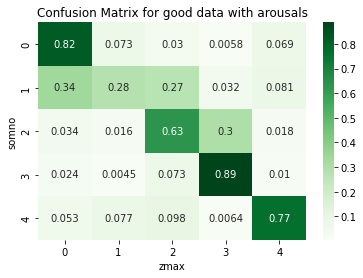

In [1]:
#good data leonora vs zmax

# -*- coding: utf-8 -*-
"""
Created on Sun Jan  2 03:51:45 2022

@author: user
"""

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn

list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]
# no 23 86 70
dfLeonora = pd.DataFrame(columns=['scorer', 'else'])

dfQs = pd.DataFrame(columns=['scorer'])

for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')

    dfLeonora = dfLeonora.append(df_Konsens, ignore_index=True)


# Here i download all txtcsv as pandas dataframes
    df_scorer1= pd.read_csv('redact_qs1_'+i+'.txt', delimiter='\t')
    dfQs = dfQs.append(df_scorer1, ignore_index=True)

dfLeonora_negative = dfLeonora.loc[(dfLeonora['scorer'] < 0)].index
dfQs_negative = dfQs.loc[(dfQs['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
df_all_negative_values_to_drop = dfLeonora_negative.union(dfQs_negative)

dfLeonora = dfLeonora[~dfLeonora.index.isin(df_all_negative_values_to_drop)]
dfQs = dfQs[~dfQs.index.isin(df_all_negative_values_to_drop)]


dfLeonora = dfLeonora.rename(columns={'scorer': 'leo_score'})
dfQs = dfQs.rename(columns={'scorer': 'qs_score'})
print (dfLeonora)
print (dfQs)

#WIT AROUSALS
AllNightsDF = pd.concat([dfLeonora, dfQs], axis=1,)
print (AllNightsDF)


AllNightsDF = AllNightsDF.drop(columns='Unnamed: 0')
print (AllNightsDF)

leo_score = AllNightsDF['leo_score'].tolist()
qs_score = AllNightsDF['qs_score'].tolist()

df_confusion = confusion_matrix(leo_score, qs_score)


print (df_confusion)
cmn = df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis]

print (cmn)
ax= plt.subplot()
sn.heatmap(cmn, annot=True, cmap="Greens")
ax.set_xlabel('zmax');ax.set_ylabel('somno'); 
ax.set_title('Confusion Matrix for good data with arousals'); 



[[  972    86    36     5    82]
 [  211   385   284    31   106]
 [  352   314 12567  5971   366]
 [   56    25   392  4915    54]
 [  250   591   745    49  5914]]
[[0.82303133 0.07281964 0.03048264 0.0042337  0.06943268]
 [0.20747296 0.37856441 0.2792527  0.03048181 0.10422812]
 [0.01798671 0.01604497 0.64215636 0.30510986 0.0187021 ]
 [0.01029033 0.0045939  0.07203234 0.9031606  0.00992282]
 [0.03311697 0.07828852 0.09868857 0.00649093 0.78341502]]


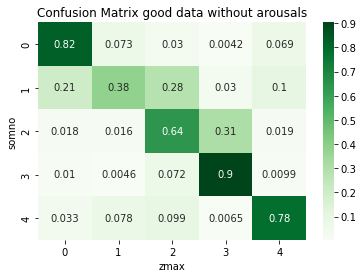

In [2]:
#now the same good data but without aro
dfLeonoraNoAro = dfLeonora.loc[(dfLeonora['else'] == 1)].index
dfLeonora = dfLeonora[~dfLeonora.index.isin(dfLeonoraNoAro)]
dfQs = dfQs[~dfQs.index.isin(dfLeonoraNoAro)]
AllNightsDFwithoutAro = pd.concat([dfLeonora, dfQs], axis=1,)

leo_score = AllNightsDFwithoutAro['leo_score'].tolist()
qs_score = AllNightsDFwithoutAro['qs_score'].tolist()
df_confusion_no_aro = confusion_matrix(leo_score, qs_score) #first y, then x
print (df_confusion_no_aro)
cmn_no_aro = df_confusion_no_aro.astype('float') / df_confusion_no_aro.sum(axis=1)[:, np.newaxis]
print (cmn_no_aro)

ax= plt.subplot()
sn.heatmap(cmn_no_aro, annot=True, cmap="Greens")
ax.set_xlabel('zmax');ax.set_ylabel('somno'); 
ax.set_title('Confusion Matrix good data without arousals'); 

In [3]:
# good data statistics without aro
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
leo_score = AllNightsDFwithoutAro['leo_score'].tolist()
qs_score = AllNightsDFwithoutAro['qs_score'].tolist()
print ('accuracy withour Aro is ', accuracy_score(leo_score, qs_score))
print (precision_score(leo_score, qs_score, average='macro'))
print (precision_score(leo_score, qs_score, average='micro'))
print (precision_score(leo_score, qs_score, average='weighted'))
print (recall_score(leo_score, qs_score, average='macro'))
print (recall_score(leo_score, qs_score, average='micro'))
print (recall_score(leo_score, qs_score, average='weighted'))
print (f1_score(leo_score, qs_score, average='macro'))
print (f1_score(leo_score, qs_score, average='micro'))
print (f1_score(leo_score, qs_score, average='weighted'))
print (cohen_kappa_score(leo_score, qs_score))

#for cappa cofidence interval
from sklearn.metrics import confusion_matrix
import math
confusion = confusion_matrix(leo_score, qs_score)
n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)


w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 

expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)

agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(leo_score, qs_score) - 1.96*SE
second_interval_number = cohen_kappa_score(leo_score, qs_score) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

accuracy withour Aro is  0.7121321096694382
0.610732129235277
0.7121321096694382
0.7975802604487846
0.7060655441699956
0.7121321096694382
0.7121321096694382
0.6298813059416719
0.7121321096694382
0.7287376512783093
0.5764755253108356
cohen kappa is
0.5764755253108356
expected agreement is  0.3203040024030828
N is  34759
agreement is  0.7121321096694382
0.0016506613121567428
confidence interval fo kappa is from  0.5732402291390084 to  0.5797108214826627
my cohens kappa is  0.5764755253108357


In [34]:
#with aro
leo_score = AllNightsDF['leo_score'].tolist()
qs_score = AllNightsDF['qs_score'].tolist()
print ('accuracy withour Aro is ', accuracy_score(leo_score, qs_score))
print (precision_score(leo_score, qs_score, average='macro'))
print (precision_score(leo_score, qs_score, average='micro'))
print (precision_score(leo_score, qs_score, average='weighted'))
print (recall_score(leo_score, qs_score, average='macro'))
print (recall_score(leo_score, qs_score, average='micro'))
print (recall_score(leo_score, qs_score, average='weighted'))
print (f1_score(leo_score, qs_score, average='macro'))
print (f1_score(leo_score, qs_score, average='micro'))
print (f1_score(leo_score, qs_score, average='weighted'))
print (cohen_kappa_score(leo_score, qs_score))

accuracy withour Aro is  0.6939611613361374
0.575818965431141
0.6939611613361374
0.7842159250724232
0.6779748124647798
0.6939611613361374
0.6939611613361374
0.5891043559917756
0.6939611613361374
0.71177131421068
0.5556422212798546


In [4]:
#for cappa cofidence interval
from sklearn.metrics import confusion_matrix
import math
confusion = confusion_matrix(leo_score, qs_score)
n_classes = confusion.shape[0]
sum0 = np.sum(confusion, axis=0)
sum1 = np.sum(confusion, axis=1)
expected = np.outer(sum0, sum1) / np.sum(sum0)


w_mat = np.ones([n_classes, n_classes], dtype=int)
w_mat.flat[:: n_classes + 1] = 0

k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
print ('cohen kappa is')
print (1 - k) 

expected_agreement = ((sum0[0]*sum1[0])/np.sum(sum0)+(sum0[1]*sum1[1])/np.sum(sum0)+(sum0[2]*sum1[2])/np.sum(sum0)+(sum0[3]*sum1[3])/np.sum(sum0)+(sum0[4]*sum1[4])/np.sum(sum0))/np.sum(sum0)
print ('expected agreement is ', expected_agreement)
N = np.sum(sum0)
print ('N is ', N)
w_mat_invert = np.logical_not(w_mat).astype(int)

agreement = np.sum(w_mat_invert * confusion)/N
print ('agreement is ', agreement)
SE = math.sqrt(agreement*(1-agreement)/N*(1-expected_agreement)*(1-expected_agreement))
print (SE)
first_interval_number = cohen_kappa_score(leo_score, qs_score) - 1.96*SE
second_interval_number = cohen_kappa_score(leo_score, qs_score) + 1.96*SE
print ('confidence interval fo kappa is from ', first_interval_number, 'to ', second_interval_number )
my_kappa = (agreement - expected_agreement)/(1-expected_agreement)
print ('my cohens kappa is ', my_kappa)

cohen kappa is
0.5764755253108356
expected agreement is  0.3203040024030828
N is  34759
agreement is  0.7121321096694382
0.0016506613121567428
confidence interval fo kappa is from  0.5732402291390084 to  0.5797108214826627
my cohens kappa is  0.5764755253108357


In [36]:
# all good data nights in cms

list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]
# no 23 86 70


for i in list_of_nights:
    
    i = str(i)

    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')
    #print (df_Konsens)
    #print(i)

# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('redact_qs1_'+i+'.txt', delimiter='\t')

    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]


    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'qs_score'})
    #print (df_Konsens)
    #print (df_scorer1)
    
    print('confusion matrix for night ' + i)
    df_confusion_night = pd.crosstab(df_Konsens['leo_score'], df_scorer1['qs_score'])
    print (df_confusion_night)

    cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
    print (cmn_night)




confusion matrix for night 12
qs_score    0   1    2    3    5
leo_score                       
0          17   2    0    0    0
1           5   6   13    5    0
2          24   8  148  260    6
3           2   0    4  134    0
5          14  11    2    0  174
qs_score          0         1         2         3         5
leo_score                                                  
0          0.894737  0.105263  0.000000  0.000000  0.000000
1          0.172414  0.206897  0.448276  0.172414  0.000000
2          0.053812  0.017937  0.331839  0.582960  0.013453
3          0.014286  0.000000  0.028571  0.957143  0.000000
5          0.069652  0.054726  0.009950  0.000000  0.865672
confusion matrix for night 13
qs_score    0   1    2    3    5
leo_score                       
0          14   2    0    1    1
1           5  10   10    0    0
2          19  15  447   75    9
3           1   0    0  105    0
5           6  27    7    0  111
qs_score          0         1         2         3         

C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confu


confusion matrix for night 22
qs_score    0   1    2    3    5
leo_score                       
0          20   2    0    0    4
1           5   4    8    0    4
2          10   5  390   28    3
3           4   0    5  118    0
5          14  19   20    1  132
qs_score          0         1         2         3         5
leo_score                                                  
0          0.769231  0.076923  0.000000  0.000000  0.153846
1          0.238095  0.190476  0.380952  0.000000  0.190476
2          0.022936  0.011468  0.894495  0.064220  0.006881
3          0.031496  0.000000  0.039370  0.929134  0.000000
5          0.075269  0.102151  0.107527  0.005376  0.709677
confusion matrix for night 24
qs_score    0   1    2    3   5
leo_score                      
0          26   1    2    2   0
1           6  12   14    2   4
2          12  16  152  251   4
3           3   1    1  117   0
5           9  22    6    0  86
qs_score          0         1         2         3         5
leo_

C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confu

qs_score    0   1    2    3    5
leo_score                       
0          24   1    3    0    0
1           9   9   13    0    0
2          15   2  182  193    2
3           4   0    0  101    0
5          10  16    9    0  113
qs_score          0         1         2         3         5
leo_score                                                  
0          0.857143  0.035714  0.107143  0.000000  0.000000
1          0.290323  0.290323  0.419355  0.000000  0.000000
2          0.038071  0.005076  0.461929  0.489848  0.005076
3          0.038095  0.000000  0.000000  0.961905  0.000000
5          0.067568  0.108108  0.060811  0.000000  0.763514
confusion matrix for night 36
qs_score    0  1    2    3    5
leo_score                      
0          21  1    0    0    0
1           5  5   15    0    0
2          21  6  381   32    6
3           2  1   11  100    1
5           6  1    8    0  143
qs_score          0         1         2         3         5
leo_score                          

C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confu


confusion matrix for night 42
qs_score    0   1    2    3    5
leo_score                       
0          16   5    1    0    0
1           5   7    3    0    0
2           6   5  367   10    8
3           4   0   13  110    0
5           4  13   21    0  153
qs_score          0         1         2         3         5
leo_score                                                  
0          0.727273  0.227273  0.045455  0.000000  0.000000
1          0.333333  0.466667  0.200000  0.000000  0.000000
2          0.015152  0.012626  0.926768  0.025253  0.020202
3          0.031496  0.000000  0.102362  0.866142  0.000000
5          0.020942  0.068063  0.109948  0.000000  0.801047
confusion matrix for night 45
qs_score    0   1    2    3   5
leo_score                      
0          25   4    1    0   2
1           9  14    5    2   3
2          10   5  176  227  12
3           2   0    0  119   0
5           6   5    4    5  94
qs_score          0         1         2         3         5
leo_

C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confu

confusion matrix for night 56
qs_score    0  1    2    3    5
leo_score                      
0           9  1    0    0    0
1          10  9   13    6    0
2          13  1  131  268    2
3           4  0    0  114    0
5           7  8   13    0  221
qs_score          0         1         2         3         5
leo_score                                                  
0          0.900000  0.100000  0.000000  0.000000  0.000000
1          0.263158  0.236842  0.342105  0.157895  0.000000
2          0.031325  0.002410  0.315663  0.645783  0.004819
3          0.033898  0.000000  0.000000  0.966102  0.000000
5          0.028112  0.032129  0.052209  0.000000  0.887550
confusion matrix for night 58
qs_score    0   1    2    3    5
leo_score                       
0           6   4    0    0    0
1          14  24    4    0    0
2          14  19  153  226   34
3           3   2    0  140    6
5           9  14    2    0  190
qs_score          0         1         2         3         5
leo_s

C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confu

confusion matrix for night 67
qs_score    0   1    2    3    5
leo_score                       
0          14   8    0    0    0
1          15   7    3    0    0
2           8   1  279  184    6
3           3   5   90   55    0
5          13  45   10    1  187
qs_score          0         1         2         3         5
leo_score                                                  
0          0.636364  0.363636  0.000000  0.000000  0.000000
1          0.600000  0.280000  0.120000  0.000000  0.000000
2          0.016736  0.002092  0.583682  0.384937  0.012552
3          0.019608  0.032680  0.588235  0.359477  0.000000
5          0.050781  0.175781  0.039062  0.003906  0.730469
confusion matrix for night 68
qs_score    0   1    2   3    5
leo_score                      
0          13   3    0   0    1
1          21  11   12   0    0
2          18  10  360  64    6
3           1   0   13  97    0
5          17  12   15  16  112
qs_score          0         1         2         3         5
leo_s

C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confusion_night.sum(axis=1)[:, np.newaxis]
C:\Users\user\AppData\Local\Temp/ipykernel_16352/1196151456.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn_night = df_confusion_night.astype('float') / df_confu


confusion matrix for night 80
qs_score    0   1    2    3    5
leo_score                       
0           8   0    1    1    0
1          17   7    7    1    9
2          21  10  125  288   19
3           1   0    0  125    0
5          28  27   43    1  113
qs_score          0         1         2         3         5
leo_score                                                  
0          0.800000  0.000000  0.100000  0.100000  0.000000
1          0.414634  0.170732  0.170732  0.024390  0.219512
2          0.045356  0.021598  0.269978  0.622030  0.041037
3          0.007937  0.000000  0.000000  0.992063  0.000000
5          0.132075  0.127358  0.202830  0.004717  0.533019
confusion matrix for night 82
qs_score    0   1    2    3   5
leo_score                      
0          21   1    0    0   0
1          12   8    7    0   1
2          29   0  430  141   8
3           1   0    1   55   0
5          36  17   27    0  68
qs_score          0         1         2         3         5
leo_

[0.8462111304664504, 0.0938250316371834, 0.022117018335052505, 0.008090152536625178, 0.02975666702468816, 0.33070311262056545, 0.2983131361673933, 0.2776428302838745, 0.03482700644526663, 0.058513914482900144, 0.033804666240592536, 0.016342094954558357, 0.6340868261775733, 0.2975407533547231, 0.018225659272552742, 0.025129312327591097, 0.003978425937670523, 0.06621641696173, 0.8933550683982066, 0.011320776374801868, 0.052901805684368385, 0.07514899204062912, 0.0989149212275033, 0.006592752965030839, 0.7664415280824682]
[0.0995581367262266, 0.09029640834013421, 0.04369653133055792, 0.022904116364824718, 0.054701844266267646, 0.15473126311303528, 0.1428299230995423, 0.16082822616122316, 0.0650234583205907, 0.11197136463993866, 0.013354277110787512, 0.025704945396997494, 0.23167763164355462, 0.2316991188601775, 0.019280042367353728, 0.017687681276105226, 0.011968224988896563, 0.10214476953035564, 0.10982858077025459, 0.03944459045518, 0.04516465553009455, 0.05198353316103582, 0.0805866870

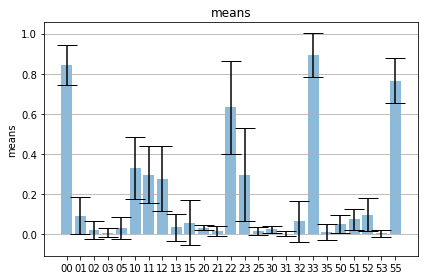

          0         1         2         3         5
0  0.846211  0.330703  0.033805  0.025129  0.052902
1  0.093825  0.298313  0.016342  0.003978  0.075149
2  0.022117  0.277643  0.634087  0.066216  0.098915
3  0.008090  0.034827  0.297541  0.893355  0.006593
5  0.029757  0.058514  0.018226  0.011321  0.766442
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.099558  0.154731  0.013354  0.017688  0.045165
1  0.090296  0.142830  0.025705  0.011968  0.051984
2  0.043697  0.160828  0.231678  0.102145  0.080587
3  0.022904  0.065023  0.231699  0.109829  0.017602
5  0.054702  0.111971  0.019280  0.039445  0.111990
list of cohens kappa
[0.437797640437113, 0.6551222090814608, 0.6982717658736576, 0.45018192786984146, 0.6296183363221777, 0.39674282108071923, 0.695216382502249, 0.7385702875995551, 0.3714458132375337, 0.7359703611883277, 0.5696696990582165, 0.6267940929520424, 0.45531088513643836, 0.4662376086291977, 0.754015491686645, 0.72943587408208

<Figure size 432x288 with 0 Axes>

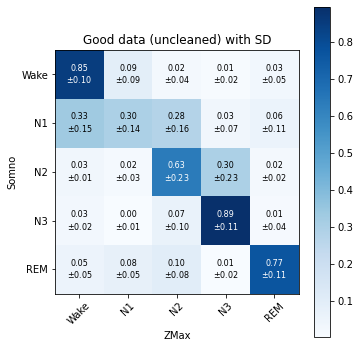

In [6]:
# good data nights in cms and mean of each list
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()

# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('redact_qs1_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]


    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'qs_score'})

    # makeing confusion matrix for everz night 

    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['qs_score']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')

    cmn_night = df_confusion_night

    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
list00 = np.array(list00)
list01 = np.array(list01)
list02 = np.array(list02)
list03 = np.array(list03)
list05 = np.array(list05)
list10 = np.array(list10)
list11 = np.array(list11)
list12 = np.array(list12)
list13 = np.array(list13)
list15 = np.array(list15)
list20 = np.array(list20)
list21 = np.array(list21)
list22 = np.array(list22)
list23 = np.array(list23)
list25 = np.array(list25)
list30 = np.array(list30)
list31 = np.array(list31)
list32 = np.array(list32)
list33 = np.array(list33)
list35 = np.array(list35)
list50 = np.array(list50)
list51 = np.array(list51)
list52 = np.array(list52)
list53 = np.array(list53)
list55 = np.array(list55)

mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)

# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)


#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]

class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=8,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Good data (uncleaned) with SD")
    plt.rc('font', size=12) 
    plt.ylabel('Somno')
    plt.xlabel('ZMax')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('Good_data_uncleaned_with_SD.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)
print (AllNightsDF['qs_score'].value_counts())
print (AllNightsDF['leo_score'].value_counts())

ValueContsDF = AllNightsDF['qs_score'].value_counts()
ValueContsDF1 = AllNightsDF['leo_score'].value_counts()
SZEpochNumberDF = pd.concat([ValueContsDF, ValueContsDF1], axis = 1)


print (SZEpochNumberDF)
SZEpochNumberDF.to_csv('SZEpochNumberDF.csv', index = True, sep = '\t')

[0.849380693560981, 0.09407643351466845, 0.02303224637585093, 0.005899886935964641, 0.02761073961253489, 0.18615706720536246, 0.42220840299754797, 0.2899198687956752, 0.032823252828761626, 0.06889140817265259, 0.017762063387617256, 0.01635741320844677, 0.643064411405698, 0.3042512056866578, 0.01856490631158015, 0.01058385233631778, 0.0040516466772032595, 0.06465608597778784, 0.9094816773092472, 0.01122673769944384, 0.03328766442419844, 0.07621507820770983, 0.10014091346393032, 0.006625207468976353, 0.783731136435185]
[0.09990483147033348, 0.08905479377969644, 0.045773879339426976, 0.01982165811300877, 0.05536845811811692, 0.14664339389308248, 0.20211684565269092, 0.1595390500971209, 0.07682152790378456, 0.134114730883209, 0.013899625098521844, 0.026064989718719664, 0.23679654760733843, 0.23521283761740858, 0.019636733102431445, 0.009993146953295208, 0.01220717725171616, 0.10210968238171197, 0.11069646517231974, 0.03787860769648677, 0.04686451123816209, 0.053950550234918, 0.082766906579

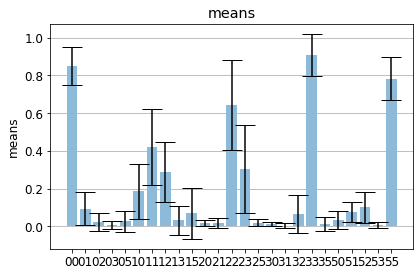

          0         1         2         3         5
0  0.849381  0.186157  0.017762  0.010584  0.033288
1  0.094076  0.422208  0.016357  0.004052  0.076215
2  0.023032  0.289920  0.643064  0.064656  0.100141
3  0.005900  0.032823  0.304251  0.909482  0.006625
5  0.027611  0.068891  0.018565  0.011227  0.783731
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         5
0  0.099905  0.146643  0.013900  0.009993  0.046865
1  0.089055  0.202117  0.026065  0.012207  0.053951
2  0.045774  0.159539  0.236797  0.102110  0.082767
3  0.019822  0.076822  0.235213  0.110696  0.018133
5  0.055368  0.134115  0.019637  0.037879  0.115765
list of cohens kappa
[0.4494903805560583, 0.6836878401812295, 0.7198277760648373, 0.46037504185735023, 0.6312533308617374, 0.4038179379979491, 0.7164940574005427, 0.7723383305365636, 0.3693013729803535, 0.7686342037463667, 0.5927639012541726, 0.6586554297331986, 0.4701659027298909, 0.4874575717423266, 0.8070497160442908, 0.7486347890541

<Figure size 432x288 with 0 Axes>

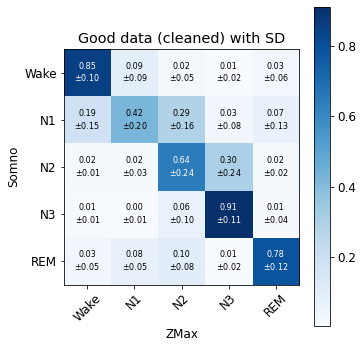

In [7]:
# good data nights in cms and mean of each list NO ARO
import statistics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
list_of_nights = [12, 13, 15, 16, 18, 20, 21, 22, 24, 25, 26, 28, 34, 35, 36, 37, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 66, 67, 68, 71, 72, 77, 78, 79, 80, 82,]

# no 23 86 70
# lists for every cell in confusion matrix
list00 = []
list01 = []
list02 = []
list03 = []
list05 = []
list10 = []
list11 = []
list12 = []
list13 = []
list15 = []
list20 = []
list21 = []
list22 = []
list23 = []
list25 = []
list30 = []
list31 = []
list32 = []
list33 = []
list35 = []
list50 = []
list51 = []
list52 = []
list53 = []
list55 = []
list_of_cohen_kappas = []
df_scorers = pd.DataFrame()
df_Konsenses = pd.DataFrame()
# Reading data
for i in list_of_nights:
    i = str(i)
    df_Konsens= pd.read_csv('scorer5_'+i+'.txt', delimiter='\t')


# Here i download all txtcsv as pandas dataframes
    df_scorer1 = pd.read_csv('redact_qs1_'+i+'.txt', delimiter='\t')
# find all negative values
    df_Konsens_negative = df_Konsens.loc[(df_Konsens['scorer'] < 0)].index
    df_scorer1_neg = df_scorer1.loc[(df_scorer1['scorer'] < 0)].index
# here imake a list of all inexes in all data frames that are les than 0
    df_all_negative_values_to_drop = df_Konsens_negative.union(df_scorer1_neg)

    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_all_negative_values_to_drop)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_all_negative_values_to_drop)]
    df_KonsensNoAro = df_Konsens.loc[(df_Konsens['else'] == 1)].index
    df_Konsens = df_Konsens[~df_Konsens.index.isin(df_KonsensNoAro)]
    df_scorer1 = df_scorer1[~df_scorer1.index.isin(df_KonsensNoAro)]


    df_Konsens = df_Konsens.rename(columns={'scorer': 'leo_score'})
    df_scorer1 = df_scorer1.rename(columns={'scorer': 'qs_score'})

    # makeing confusion matrix for everz night 

    Konsens_list = df_Konsens['leo_score']
    scorer_list = df_scorer1['qs_score']
    df_confusion_night = confusion_matrix(Konsens_list, scorer_list, normalize='true')

    cmn_night = df_confusion_night

    # append everz cell of confusion matrix to corresponding list
    list00.append(cmn_night[0][0])
    list01.append(cmn_night[0][1]) 
    list02.append(cmn_night[0][2]) 
    list03.append(cmn_night[0][3]) 
    list05.append(cmn_night[0][4]) 
    list10.append(cmn_night[1][0]) 
    list11.append(cmn_night[1][1]) 
    list12.append(cmn_night[1][2]) 
    list13.append(cmn_night[1][3]) 
    list15.append(cmn_night[1][4]) 
    list20.append(cmn_night[2][0]) 
    list21.append(cmn_night[2][1]) 
    list22.append(cmn_night[2][2]) 
    list23.append(cmn_night[2][3]) 
    list25.append(cmn_night[2][4]) 
    list30.append(cmn_night[3][0]) 
    list31.append(cmn_night[3][1]) 
    list32.append(cmn_night[3][2]) 
    list33.append(cmn_night[3][3]) 
    list35.append(cmn_night[3][4])
    list50.append(cmn_night[4][0])
    list51.append(cmn_night[4][1])
    list52.append(cmn_night[4][2]) 
    list53.append(cmn_night[4][3]) 
    list55.append(cmn_night[4][4])  
    kappa_score = cohen_kappa_score(scorer_list, Konsens_list)
    list_of_cohen_kappas.append(kappa_score)
    df_scorers = df_scorers.append(df_scorer1, ignore_index=True)
    df_Konsenses = df_Konsenses.append(df_Konsens, ignore_index=True)
# counting mean of everz list
list00 = np.array(list00)
list01 = np.array(list01)
list02 = np.array(list02)
list03 = np.array(list03)
list05 = np.array(list05)
list10 = np.array(list10)
list11 = np.array(list11)
list12 = np.array(list12)
list13 = np.array(list13)
list15 = np.array(list15)
list20 = np.array(list20)
list21 = np.array(list21)
list22 = np.array(list22)
list23 = np.array(list23)
list25 = np.array(list25)
list30 = np.array(list30)
list31 = np.array(list31)
list32 = np.array(list32)
list33 = np.array(list33)
list35 = np.array(list35)
list50 = np.array(list50)
list51 = np.array(list51)
list52 = np.array(list52)
list53 = np.array(list53)
list55 = np.array(list55)

mean00 = np.mean(list00)
mean01 = np.mean(list01)
mean02 = np.mean(list02)
mean03 = np.mean(list03)
mean05 = np.mean(list05)
mean10 = np.mean(list10)
mean11 = np.mean(list11)
mean12 = np.mean(list12)
mean13 = np.mean(list13)
mean15 = np.mean(list15)
mean20 = np.mean(list20)
mean21 = np.mean(list21)
mean22 = np.mean(list22)
mean23 = np.mean(list23)
mean25 = np.mean(list25)
mean30 = np.mean(list30)
mean31 = np.mean(list31)
mean32 = np.mean(list32)
mean33 = np.mean(list33)
mean35 = np.mean(list35)
mean50 = np.mean(list50)
mean51 = np.mean(list51)
mean52 = np.mean(list52)
mean53 = np.mean(list53)
mean55 = np.mean(list55)


# counting and printing stdev
stdev00 = np.std(list00)
stdev01 = np.std(list01)
stdev02 = np.std(list02)
stdev03 = np.std(list03)
stdev05 = np.std(list05)

stdev10 = np.std(list10)
stdev11 = np.std(list11)
stdev12 = np.std(list12)
stdev13 = np.std(list13)
stdev15 = np.std(list15)

stdev20 = np.std(list20)
stdev21 = np.std(list21)
stdev22 = np.std(list22)
stdev23 = np.std(list23)
stdev25 = np.std(list25)

stdev30 = np.std(list30)
stdev31 = np.std(list31)
stdev32 = np.std(list32)
stdev33 = np.std(list33)
stdev35 = np.std(list35)

stdev50 = np.std(list50)
stdev51 = np.std(list51)
stdev52 = np.std(list52)
stdev53 = np.std(list53)
stdev55 = np.std(list55)



#making list of means and stds and two more list with labels and classes
means = [mean00, mean01, mean02, mean03, mean05, mean10, mean11, mean12, mean13, mean15, mean20, mean21, mean22, mean23, mean25, mean30, mean31, mean32, mean33, mean35, mean50, mean51, mean52, mean53, mean55, ]
stdevs = [stdev00, stdev01, stdev02, stdev03, stdev05, stdev10, stdev11, stdev12, stdev13, stdev15, stdev20, stdev21, stdev22, stdev23, stdev25, stdev30, stdev31, stdev32, stdev33, stdev35, stdev50, stdev51, stdev52, stdev53, stdev55, ]
labels = ['00', '01', '02', '03', '05', '10', '11', '12', '13', '15', '20', '21', '22', '23', '25', '30', '31', '32', '33', '35', '50', '51', '52', '53', '55', ]
class_list = ['Wake','N1','N2','N3','REM']
x_pos = np.arange(len(labels))
print (means)
print (stdevs)
# first plot, which is prettz bad
fig, ax = plt.subplots()
ax.bar(x_pos, means,
       yerr=stdevs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('means')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('means')
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()
#makind and printing dataframe confusion matrrix of means just for us 
DataForConfusionMatrixMeanDataFrame = {'0': [mean00, mean01, mean02, mean03, mean05],
        '1': [mean10, mean11, mean12, mean13, mean15],
        '2': [mean20, mean21, mean22, mean23, mean25],
        '3': [mean30, mean31, mean32, mean33, mean35],
        '5': [mean50, mean51, mean52, mean53, mean55],
        }
ConfusionMatrixMeanDataFrame = pd.DataFrame(DataForConfusionMatrixMeanDataFrame, index=['0','1','2','3','5'])
print (ConfusionMatrixMeanDataFrame)
print (type(ConfusionMatrixMeanDataFrame))


#making and printing dataframe confusion matrrix of std just for us 
DataForConfusionMatrixStDevDataFrame = {'0': [stdev00, stdev01, stdev02, stdev03, stdev05],
        '1': [stdev10, stdev11, stdev12, stdev13, stdev15],
        '2': [stdev20, stdev21, stdev22, stdev23, stdev25],
        '3': [stdev30, stdev31, stdev32, stdev33, stdev35],
        '5': [stdev50, stdev51, stdev52, stdev53, stdev55],
        }
ConfusionMatrixStDevDataFrame = pd.DataFrame(DataForConfusionMatrixStDevDataFrame, index=['0','1','2','3','5'])

print (ConfusionMatrixStDevDataFrame)

DataCMMean = [[mean00, mean01, mean02, mean03, mean05], [mean10, mean11, mean12, mean13, mean15], [mean20, mean21, mean22, mean23, mean25], [mean30, mean31, mean32, mean33, mean35], [mean50, mean51, mean52, mean53, mean55]]
DataCMSTDEV = [[stdev00, stdev01, stdev02, stdev03, stdev05], [stdev10, stdev11, stdev12, stdev13, stdev15], [stdev20, stdev21, stdev22, stdev23, stdev25], [stdev30, stdev31, stdev32, stdev33, stdev35], [stdev50, stdev51, stdev52, stdev53, stdev55]]

# lists of rows into np arraz
ArrayDataCMMean = np.array(DataCMMean)
ArrayDataCMSTDEV = np.array(DataCMSTDEV)
#function for plotting
def plot_confusion_matrix(cm, cms,  classes,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, '{0:.2f}'.format(cm[i, j]) + '\n$\pm$' + '{0:.2f}'.format(cms[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center", fontsize=8,
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title("Good data (cleaned) with SD")
    plt.rc('font', size=12) 
    plt.ylabel('Somno')
    plt.xlabel('ZMax')


# Plot non-normalized confusion matrix
plt.figure()
plt.figure(figsize=(5, 5))
plot_confusion_matrix(ArrayDataCMMean, ArrayDataCMSTDEV, classes=class_list)
plt.savefig('Good_data_cleaned_with_SD.png', bbox_inches='tight')

print ("list of cohens kappa")
print (list_of_cohen_kappas)
mean_of_cohens_kappa = np.mean(list_of_cohen_kappas)
print ('mean of cohens kappa list is ', mean_of_cohens_kappa)
stdev_of_cohens_kappa_list = np.std(list_of_cohen_kappas)
print ('stdev of cohens_kappa_list is ', stdev_of_cohens_kappa_list)

AllNightsDF = pd.concat([df_scorers, df_Konsenses], axis=1,)
AllNightsDF = AllNightsDF.dropna()
print (AllNightsDF)
print (AllNightsDF['qs_score'].value_counts())
print (AllNightsDF['leo_score'].value_counts())

ValueContsDF = AllNightsDF['qs_score'].value_counts()
ValueContsDF1 = AllNightsDF['leo_score'].value_counts()
SZEpochNumberDFNoAro = pd.concat([ValueContsDF, ValueContsDF1], axis = 1)


print (SZEpochNumberDFNoAro)
SZEpochNumberDFNoAro.to_csv('SZEpochNumberDFNoAro.csv', index = True, sep = '\t')

In [9]:
df_number_of_epochs_SZ = pd.read_csv('SZEpochNumberDF.csv', delimiter='\t')
df_number_of_epochs_SZ.columns = ['Sleep stage', 'ZMax', 'Somno consensus']
df_number_of_epochs_SZ = df_number_of_epochs_SZ[['Sleep stage','Somno consensus', 'ZMax', ]]
print (df_number_of_epochs_SZ)
df_number_of_epochs_SZ.style

   Sleep stage  Somno consensus   ZMax
0            0             2398   4581
1            1             2433   2860
2            2            39918  28531
3            3            11011  22078
4            5            15612  13322


,Sleep stage,Somno consensus,ZMax
0,0,2398,4581
1,1,2433,2860
2,2,39918,28531
3,3,11011,22078
4,5,15612,13322


In [11]:
df_number_of_epochs_SZ_no_Aro = pd.read_csv('SZEpochNumberDFnoAro.csv', delimiter='\t')
df_number_of_epochs_SZ_no_Aro.columns = ['Sleep stage', 'ZMax', 'Somno consensus']
df_number_of_epochs_SZ_no_Aro = df_number_of_epochs_SZ_no_Aro[['Sleep stage','Somno consensus', 'ZMax', ]]
print (df_number_of_epochs_SZ_no_Aro)
df_number_of_epochs_SZ_no_Aro.style

   Sleep stage  Somno consensus   ZMax
0            0             1181   1841
1            1             1017   1401
2            2            19570  14024
3            3             5442  10971
4            5             7549   6522


,Sleep stage,Somno consensus,ZMax
0,0,1181,1841
1,1,1017,1401
2,2,19570,14024
3,3,5442,10971
4,5,7549,6522
